In [311]:
#https://pwilmart.github.io/IRS_normalization/understanding_IRS.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [310]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text

def make_pca(in_df, palette, top=500):
    cols = in_df.columns
    pca = PCA(n_components=2)
    
    sorted_mean = in_df.mean(axis=1).sort_values()
    select = sorted_mean.tail(top)
    #print(top)
    in_df = in_df.loc[select.index.values]
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    print(pca.explained_variance_ratio_)
    temp_df['color']=palette
    fig,ax=plt.subplots(figsize=(16,8))
    temp_df.plot(kind='scatter',x='pc_1',y='pc_2',s=30, c=temp_df['color'], ax=ax)
    #print(temp_df.index.values)
       
    texts = [plt.text(temp_df.iloc[i]['pc_1'], 
                       temp_df.iloc[i]['pc_2'],
                       cols[i])
                       for i in range(temp_df.shape[0])]
    
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    ax.set_title('PCA',size=14)
    ax.set_xlabel('PC1_{:.3f}'.format(pca.explained_variance_ratio_[0]),size=12)
    ax.set_ylabel('PC2_{:.3f}'.format(pca.explained_variance_ratio_[1]),size=12)
    
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)

    #if not os.path.exists(path+'figs'):  
        #os.makedirs(path+'figs')
    #fig.savefig(path+'figs/pca.svg')
    #fig.savefig(path+'figs/pca.png')
    #fig.savefig(path+'figs/pca.pdf')
    #plt.legend()
    plt.show()

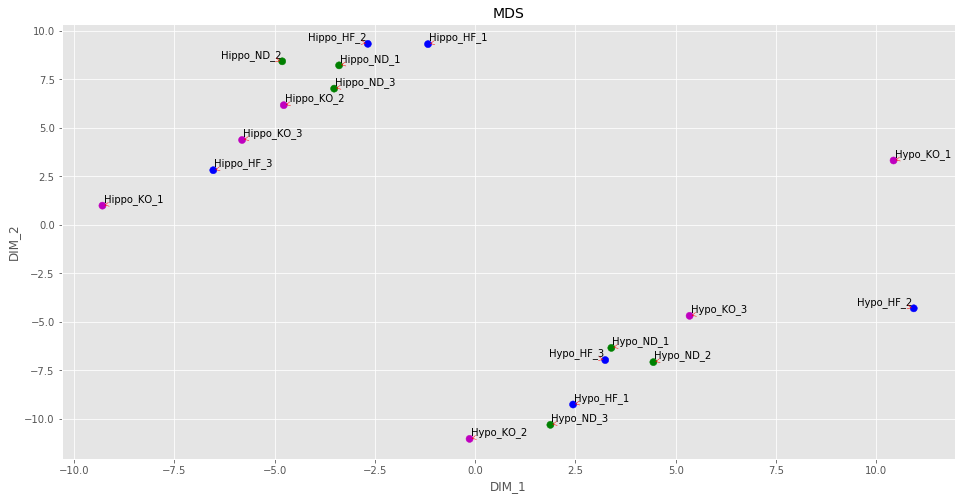

In [313]:
def make_mds(in_df, palette, top=500):
    cols = in_df.columns
    pca = MDS(n_components=2,metric=True)
    
    sorted_mean = in_df.mean(axis=1).sort_values()
    select = sorted_mean.tail(top)
    #print(top)
    in_df = in_df.loc[select.index.values]
    temp_df = pd.DataFrame(pca.fit_transform(in_df.T),
                                 index=cols,columns =['pc_1','pc_2'] )
    
    #temp_df = pd.DataFrame()
    #temp_df['pc_1']=pca.components_[0]
    #temp_df['pc_2']=pca.components_[1]
    #temp_df.index = cols
    #print(pca.explained_variance_ratio_)
    temp_df['color']=palette
    fig,ax=plt.subplots(figsize=(16,8))
    temp_df.plot(kind='scatter',x='pc_1',y='pc_2',s=50, c=temp_df['color'], ax=ax)
    #print(temp_df.index.values)
       
    texts = [plt.text(temp_df.iloc[i]['pc_1'], 
                       temp_df.iloc[i]['pc_2'],
                       cols[i])
                       for i in range(temp_df.shape[0])]
    
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    ax.set_title('MDS',size=14)
    ax.set_xlabel('DIM_1',size=12)
    ax.set_ylabel('DIM_2',size=12)
    
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)

    #if not os.path.exists(path+'figs'):  
        #os.makedirs(path+'figs')
    #fig.savefig(path+'figs/pca.svg')
    #fig.savefig(path+'figs/pca.png')
    #fig.savefig(path+'figs/pca.pdf')
    #plt.legend()
    plt.show()
    
make_mds(np.log2(df), my_pal)

In [254]:
df1 = pd.read_table('Hippocampus_export.csv', sep='\t')
df1.columns = ['Hippo_'+n for n in df1.columns]
print(df1.shape)
df1.head()

(7043, 10)


D:\michele\miniconda3\envs\prediction\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hippo_Protein IDs
0,37382.0,44103.0,43120.0,39512.0,43439.0,34445.0,32882.0,37165.0,37203.0,S4R2S6_MOUSE
1,1458800.0,1533800.0,1416400.0,1378000.0,1522300.0,1216900.0,1085100.0,1490200.0,1312600.0,E9PXY1_MOUSE
2,1276900.0,1345800.0,1226700.0,1125400.0,1316500.0,1008900.0,851180.0,1273000.0,1083300.0,BIG2_MOUSE
3,751950.0,790170.0,693740.0,671740.0,732560.0,575820.0,485000.0,751780.0,636580.0,TANC2_MOUSE
4,280690.0,279700.0,300880.0,335690.0,305910.0,253170.0,280620.0,288580.0,291180.0,F1712_MOUSE


In [255]:
df1[df1['Hippo_Protein IDs'].isin(['E41L1_MOUSE'])]

,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hippo_Protein IDs
6181,77776.0,69278.0,74622.0,85246.0,82539.0,83851.0,456450.0,496570.0,485760.0,E41L1_MOUSE


In [256]:
import pandas as pd
df2 = pd.read_table('Hypothalamus_export.csv', sep='\t')
df2.columns = ['Hypo_'+n for n in df2.columns]
print(df2.shape)
df2.head()

(7295, 10)


D:\michele\miniconda3\envs\prediction\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hypo_Protein IDs
0,48229.0,54599.0,37258.0,33234.0,5241.4,70258.0,67197.0,50585.0,50044.0,TM275_MOUSE
1,17337.0,17854.0,15194.0,14568.0,10197.0,17639.0,24198.0,15684.0,19584.0,S4R2S6_MOUSE
2,528110.0,538980.0,451470.0,428220.0,416790.0,505980.0,805400.0,483620.0,591570.0,E9PXY1_MOUSE
3,296380.0,319230.0,264040.0,247620.0,164990.0,301000.0,463390.0,293720.0,345080.0,BIG2_MOUSE
4,7623.7,8644.8,7007.2,6378.0,4035.8,7605.4,12413.0,6262.6,8306.6,SMUF2_MOUSE


In [257]:
df2[df2['Hypo_Protein IDs'].isin(['E41L1_MOUSE'])]

,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3,Hypo_Protein IDs
6441,55877.0,58881.0,47236.0,56419.0,52416.0,63847.0,606110.0,366010.0,433220.0,E41L1_MOUSE


In [258]:
df = df1.merge(df2, left_on='Hippo_Protein IDs', right_on='Hypo_Protein IDs'  ,how='inner')

In [259]:
print (df.shape)
df.head()
genes = df['Hippo_Protein IDs']
del df['Hippo_Protein IDs'],df['Hypo_Protein IDs']


(5570, 20)


In [260]:
groups = ["ND1"]*3+["HF1"]*3+["KO1"]*3+["ND2"]*3+["HF2"]*3+["KO2"]*3

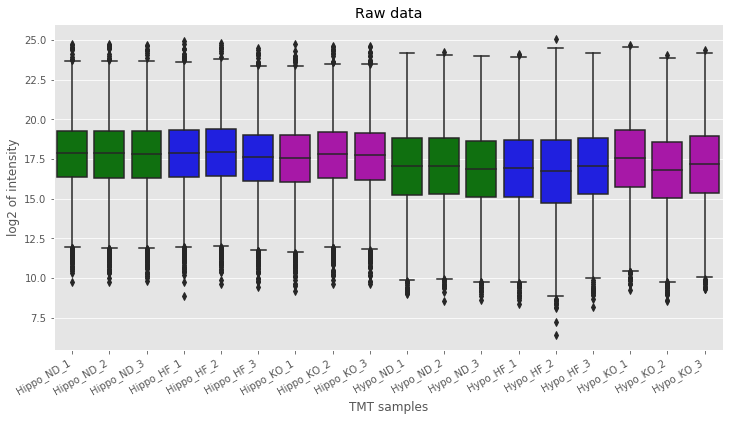

In [261]:
my_pal = ["g"]*3+["b"]*3+["m"]*3
my_pal=my_pal*2
fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(df),ax=ax,palette=my_pal)
g.set_xticklabels(df.columns, rotation=30, ha='right')
plt.title('Raw data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

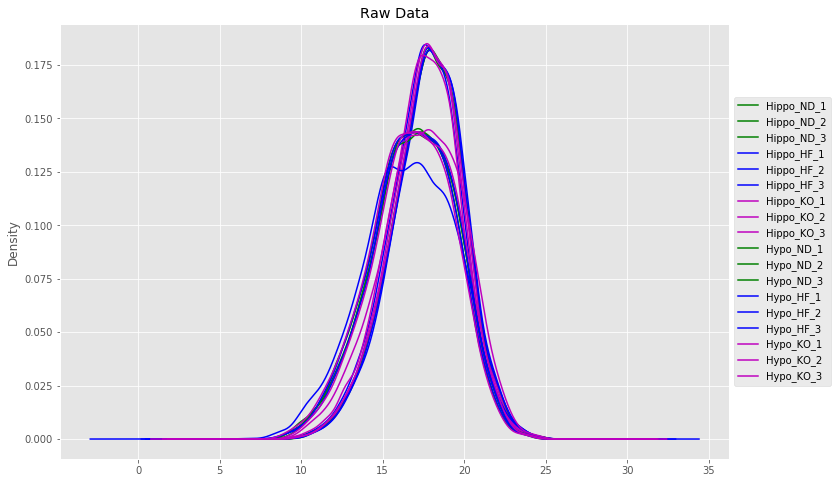

In [266]:
fig,ax=plt.subplots(figsize=(12,8))
np.log2(df).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Raw Data')
plt.show()

[0.84765505 0.13022718]


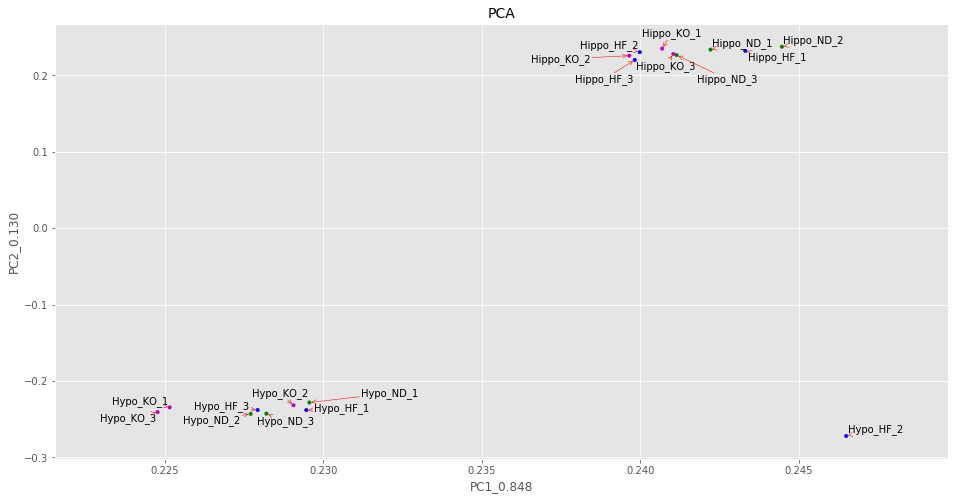

In [309]:
make_pca(np.log2(df), my_pal)

# Strong bias by experiment
modification of ires normalization
### first step: Norm by columns

mean sum intensity 3021504907.4477773


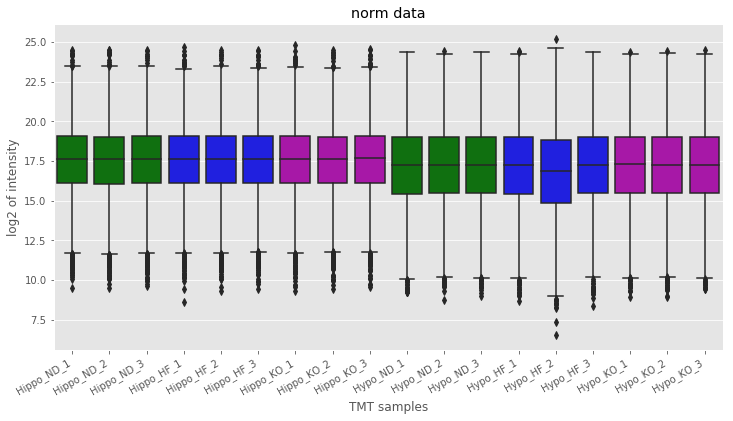

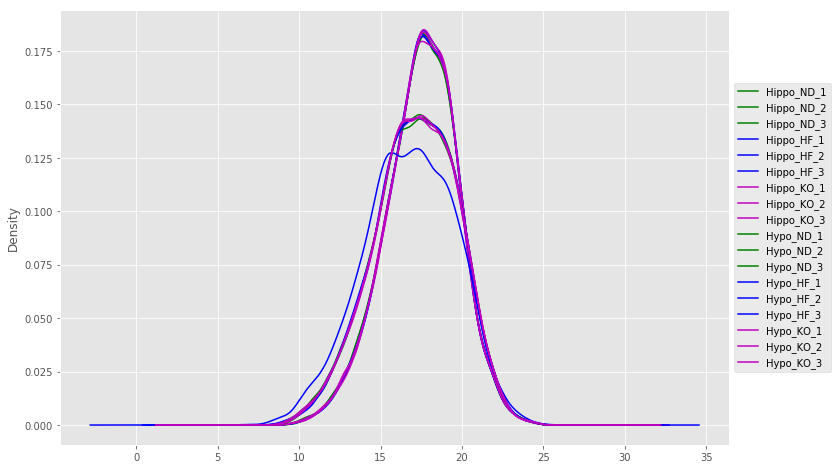

In [270]:
#first: equalize intensity of each column to mean sum intesity of the TMT channels for all experiments
#experiment 1
exp1_raw = df.iloc[:,0:9]
#experiment 1
exp2_raw = df.iloc[:,9:18]
#mean of the sum intensity of all channels
target = np.mean(pd.concat([exp1_raw.sum(axis=0), exp2_raw.sum(axis=0)]))
print('mean sum intensity', target)

#normalization factors for first experiment
norm_facs = target / exp1_raw.sum(axis=0)
exp1_sl = exp1_raw.multiply(norm_facs, axis=1)

#normalization factors for second experiment
norm_facs = target / exp2_raw.sum(axis=0)
exp2_sl = exp2_raw.multiply(norm_facs, axis=1)

#normalized experiment
data_sl =pd.concat([exp1_sl, exp2_sl], axis=1)


fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(data_sl),ax=ax,palette=my_pal)
g.set_xticklabels(data_sl.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
np.log2(data_sl).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
### second step: Norm by raw

In [271]:
#mean of the sum intensity of all the proteins in each channel
irs = pd.concat([exp1_sl.sum(axis=1), exp2_sl.sum(axis=1)],axis=1)
irs.columns = ["sum1", "sum2"]
#geometric mean of the sum intensity of all the proteins
irs['average']=np.exp(np.log(irs).mean(axis=1))
#normalization factors for each protein in each dataset
irs['fac1']=irs['average'] / irs['sum1']
irs['fac2']=irs['average'] / irs['sum2']

In [272]:
irs.head()

,sum1,sum2,average,fac1,fac2
0,3.137698e+05,1.720944e+05,2.323747e+05,0.740590,1.350275
1,1.113971e+07,5.340501e+06,7.713083e+06,0.692395,1.444262
2,9.409073e+06,3.037163e+06,5.345735e+06,0.568147,1.760108
3,5.451407e+06,5.258828e+06,5.354252e+06,0.982178,1.018145
4,2.358407e+06,1.169310e+06,1.660635e+06,0.704134,1.420184


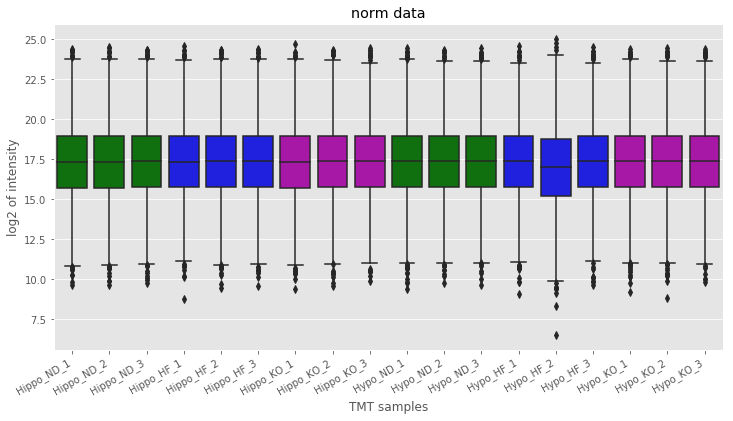

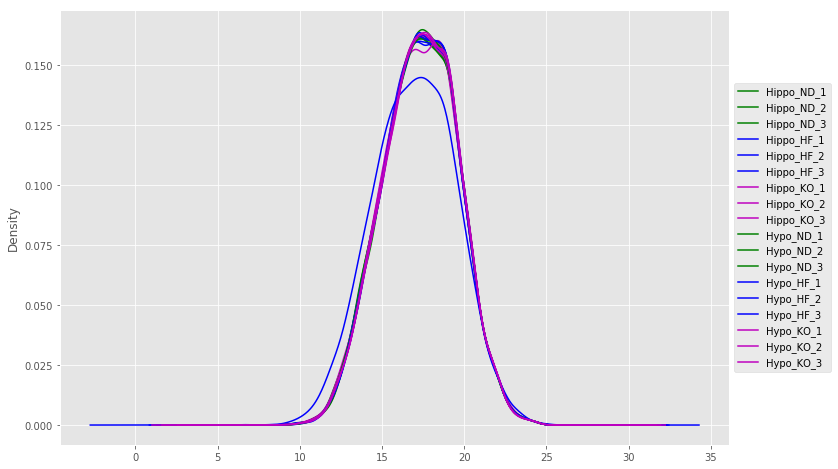

In [273]:
#apply normalization factors for eaqch protein in dataset 1 and 2
data_irs_1 = exp1_sl.multiply(irs.fac1, axis=0)
data_irs_2 = exp2_sl.multiply(irs.fac2, axis=0)
#combine again
data_irs = pd.concat([data_irs_1,data_irs_2],axis=1)

fig,ax=plt.subplots(figsize=(12,6))
g = sns.boxplot(data=np.log2(data_irs),ax=ax,palette=my_pal)
g.set_xticklabels(data_irs.columns, rotation=30, ha='right')
plt.title('norm data')
plt.xlabel('TMT samples')
plt.ylabel('log2 of intensity')
plt.show()

fig,ax=plt.subplots(figsize=(12,8))
np.log2(data_irs).plot(kind='kde',ax=ax,color=my_pal)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[0.99270355 0.00361151]


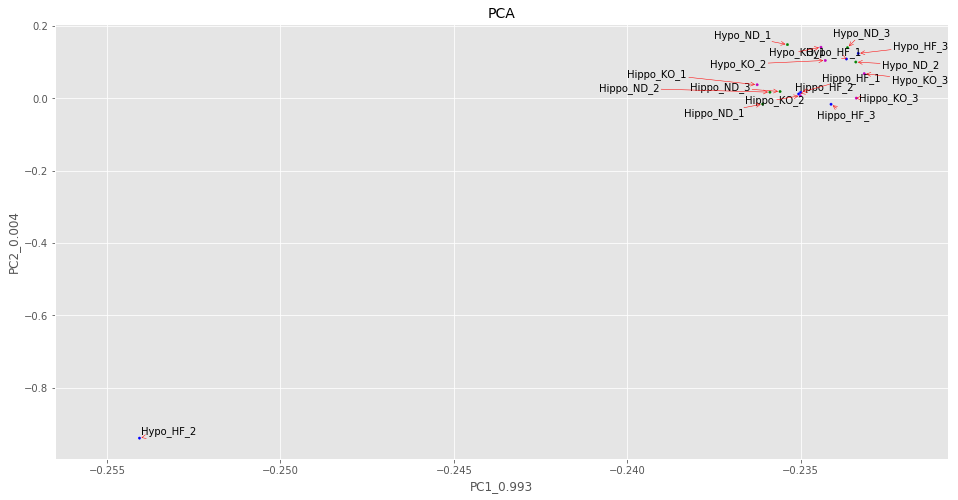

In [274]:
make_pca(np.log2(data_irs), my_pal) 

In [198]:
data_irs.head()

,Hippo_ND_1,Hippo_ND_2,Hippo_ND_3,Hippo_HF_1,Hippo_HF_2,Hippo_HF_3,Hippo_KO_1,Hippo_KO_2,Hippo_KO_3,Hypo_ND_1,Hypo_ND_2,Hypo_ND_3,Hypo_HF_1,Hypo_HF_2,Hypo_HF_3,Hypo_KO_1,Hypo_KO_2,Hypo_KO_3
0,23407.612269,27600.953343,27960.515129,24321.125476,26121.830617,26000.604979,25705.165212,24763.175192,26493.762285,27071.914101,28025.386809,26573.879463,24745.592131,15056.165766,27434.643345,26635.679470,28419.596865,28411.886552
1,854017.188804,897430.776933,858674.586298,793012.709990,855855.237609,858792.870751,793063.958194,928309.996888,873925.372424,882049.849125,904924.736156,844569.629631,778016.109394,658238.050071,841748.660350,948243.026697,937322.531798,917970.104668
2,613386.658862,646129.145548,610221.687303,531427.987875,607333.882413,584235.904368,510465.554740,650703.965884,591830.405204,603269.058261,653186.087552,601962.872281,548277.949480,317553.375759,610251.698774,664887.407925,693763.971009,652582.771157
3,624447.574953,655826.445957,596589.478625,548363.200986,584224.047366,576443.102686,502824.407919,664317.049422,601216.790353,592338.046352,625293.994977,563353.909204,549916.748639,566068.828733,591580.470090,617560.951570,636385.321823,611753.826881
4,167108.750740,166427.882332,185497.220583,196458.457284,174902.144426,181696.756975,208573.181096,182816.795530,197153.678655,182465.769501,184924.823195,183372.827567,197630.469152,152540.910980,187993.704372,190075.827041,190849.486786,190781.049026


In [283]:
data_irs.join(genes).to_csv('data_irs.txt',sep='\t',index=False)
#moving to r for differential protein expression

In [ ]:
#data_irs_tmm=pd.read_csv('data_irs_tmm.csv')

In [ ]:
#data_irs_tmm.head()

In [282]:
#make_pca(np.log2(data_irs_tmm[[n for n in data_irs_tmm.columns if n not in ['Hypo_HF_2']]]))

In [281]:
#temp = pd.read_csv('tt_nd1_nd2')
#temp.head()

In [280]:
#data_irs_tmm.shape,temp.shape
#data_irs_tmm.drop(['genes','logFC','logCPM','PValue','FDR'],axis=1,inplace=True)

In [279]:
#data_irs_tmm = data_irs_tmm.join(temp)

In [278]:
#data_irs_tmm =data_irs_tmm.join(df1[['Hippo_Protein IDs']])

In [276]:
#data_irs_tmm.sort_values('PValue')[['Hippo_Protein IDs','logFC','logCPM','PValue']].head(30)

In [275]:
#data_irs_tmm[data_irs_tmm['Hippo_Protein IDs'].isin(['SMC1A_MOUSE'])]